In [60]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

In [61]:
# Wrapper class for KernelPCA with score method
class KernelPCAWithScore(KernelPCA, BaseEstimator):
    def score(self, X, y=None):
        return np.mean(self.transform(X))

In [62]:
cancer = pd.read_csv("cancer.csv")
cancer.dropna(thresh=3, inplace=True)
cancer.dropna(axis = 1, inplace = True)

cancer.columns = ["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Component Analysis

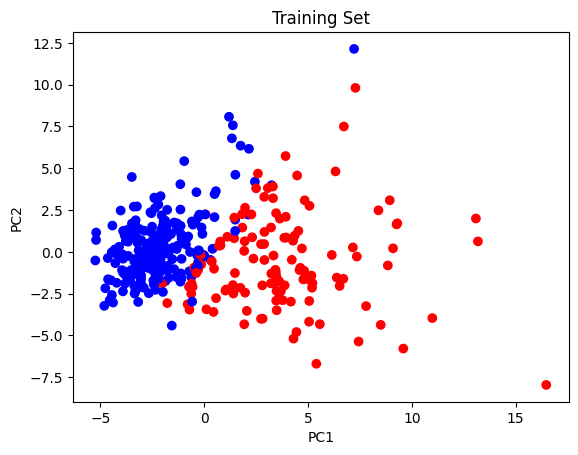

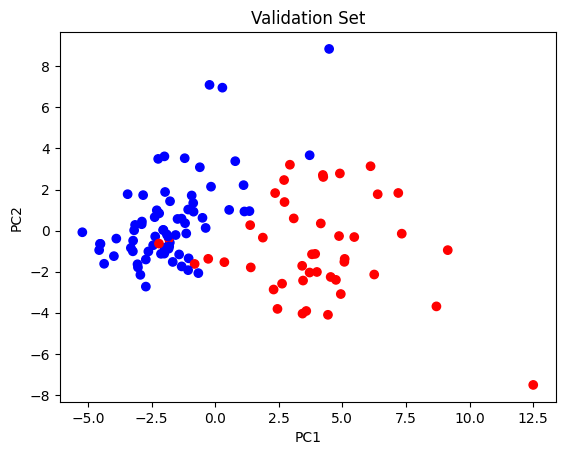

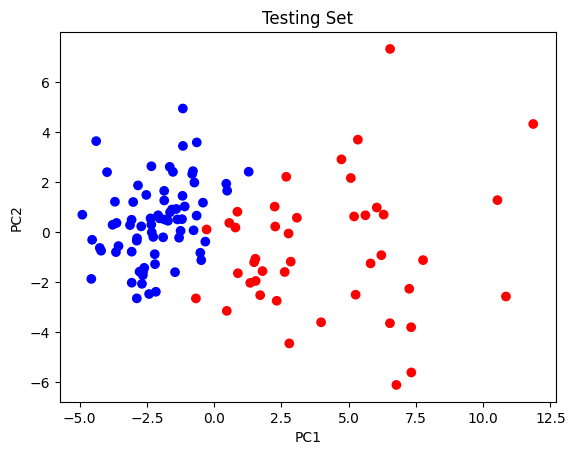

In [63]:
cancer_features = cancer.drop(['id', 'diagnosis'], axis=1)
cancer_labels = cancer['diagnosis']
cancer_features = cancer_features.fillna(cancer_features.mean())

X_train, X_test, y_train, y_test = train_test_split(cancer_features, cancer_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_val_pca = pca.transform(X_val_std)
X_test_pca = pca.transform(X_test_std)

# Visualize the results
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train.map({"M": "red", "B": "blue"}))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Training Set")
plt.show()

plt.scatter(X_val_pca[:, 0], X_val_pca[:, 1], c=y_val.map({"M": "red", "B": "blue"}))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Validation Set")
plt.show()

plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test.map({"M": "red", "B": "blue"}))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Testing Set")
plt.show()


Looking for the elbow point

In [64]:
print(X_train_std.shape)
print(X_train_pca.shape)

(341, 30)
(341, 2)


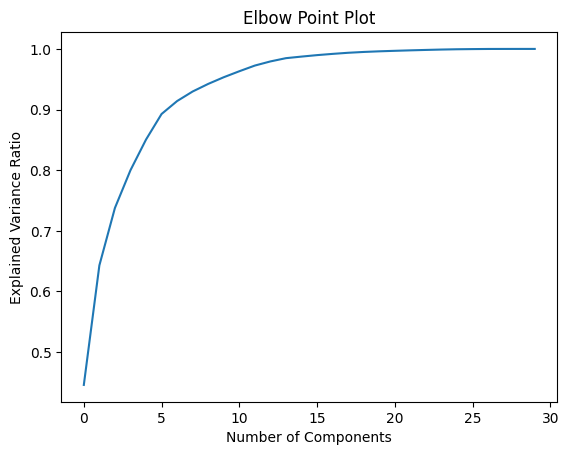

The optimal number of components is 10


In [65]:
pca = PCA()
pca.fit(X_train_std)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Point Plot')
plt.show()

n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95) + 1
print(f"The optimal number of components is {n_components}")


Randomized PCA

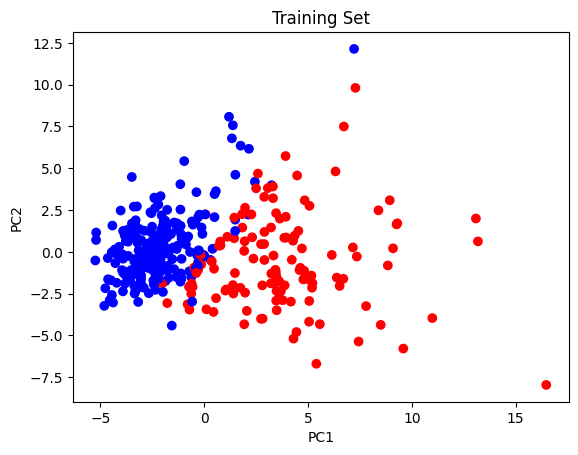

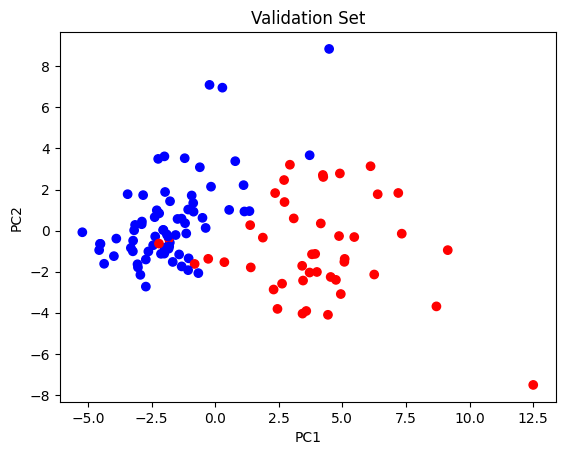

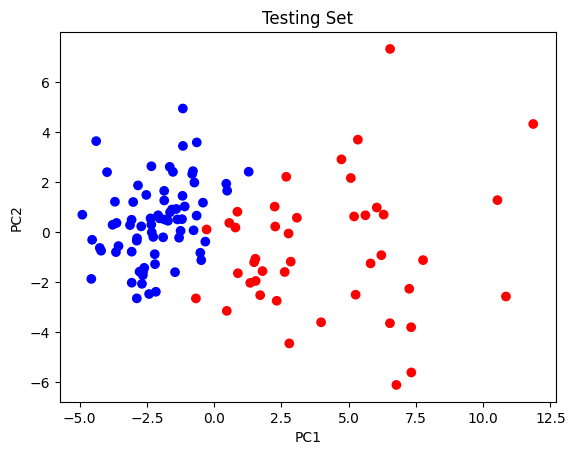

In [66]:
pca = PCA(n_components=2, svd_solver='randomized')
X_train_pca = pca.fit_transform(X_train_std)
X_val_pca = pca.transform(X_val_std)
X_test_pca = pca.transform(X_test_std)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train.map({"M": "red", "B": "blue"}))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Training Set")
plt.show()

plt.scatter(X_val_pca[:, 0], X_val_pca[:, 1], c=y_val.map({"M": "red", "B": "blue"}))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Validation Set")
plt.show()

plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test.map({"M": "red", "B": "blue"}))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Testing Set")
plt.show()

Incremental PCA

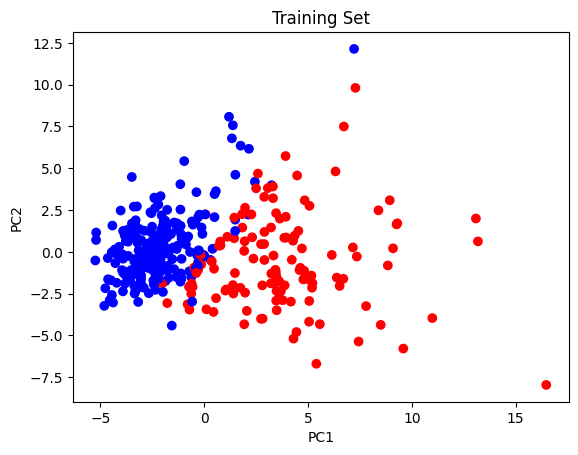

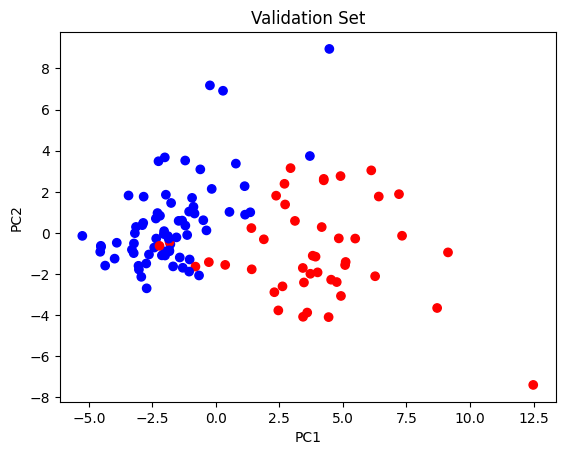

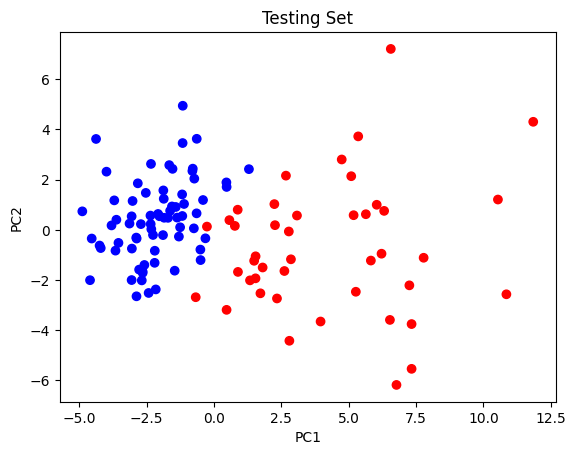

In [67]:

ipca = IncrementalPCA(n_components=2)

for batch in np.array_split(X_train_std, len(X_train_std) // 10):
    ipca.partial_fit(batch)

X_val_pca = ipca.transform(X_val_std)
X_test_pca = ipca.transform(X_test_std)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train.map({"M": "red", "B": "blue"}))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Training Set")
plt.show()

plt.scatter(X_val_pca[:, 0], X_val_pca[:, 1], c=y_val.map({"M": "red", "B": "blue"}))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Validation Set")
plt.show()

plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test.map({"M": "red", "B": "blue"}))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Testing Set")
plt.show()

In [68]:
X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_std)
X_val_pca = pca.transform(X_val_std)
X_test_pca = pca.transform(X_test_std)

In [69]:
print("Eigenvalues:")
print(pca.explained_variance_)
print()
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()
print("EigenVectors")
print(pca.components_)

Eigenvalues:
[13.41292912  5.93255254  2.84982535  1.87257214  1.52151254  1.26930673
  0.64231415  0.47448828  0.37676494  0.33135024]

Variances (Percentage):
[44.57865007 19.71718342  9.47156029  6.22360243  5.05683542  4.21861473
  2.13476844  1.57698938  1.25220018  1.1012618 ]

EigenVectors
[[ 2.10597997e-01  1.04522462e-01  2.20092193e-01  2.13796347e-01
   1.41788586e-01  2.38907932e-01  2.56728697e-01  2.59191656e-01
   1.44943609e-01  6.74953254e-02  2.09359582e-01  3.81919009e-02
   2.15231086e-01  2.06702090e-01  1.76370201e-02  1.76698507e-01
   1.55679013e-01  1.84268957e-01  5.09684665e-02  1.04816168e-01
   2.23110134e-01  1.10844404e-01  2.32589227e-01  2.20430527e-01
   1.26756351e-01  2.13248801e-01  2.33454766e-01  2.50022376e-01
   1.29328171e-01  1.30605155e-01]
 [-2.42798001e-01 -7.50095291e-02 -2.24955530e-01 -2.39311275e-01
   1.90835830e-01  1.46322258e-01  6.18291254e-02 -3.11563720e-02
   1.91713227e-01  3.61312520e-01 -9.73496238e-02  1.13708876e-01
  -8.03

In [70]:
# Kernel PCA
kpca = KernelPCAWithScore()
parameters = {
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': np.logspace(-4, 4, 9),
    'n_components': [2, 3, 4, 5]
}
grid_search = GridSearchCV(kpca, parameters, cv=5)
grid_search.fit(X_train_std)

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

# Apply the best Kernel PCA to the datasets
best_kpca = grid_search.best_estimator_
X_train_kpca = best_kpca.transform(X_train_std)
X_val_kpca = best_kpca.transform(X_val_std)
X_test_kpca = best_kpca.transform(X_test_std)

# Train a classifier on the transformed data
svm = SVC()
svm.fit(X_train_kpca, y_train)

# Evaluate on the validation set
val_accuracy = svm.score(X_val_kpca, y_val)
print("Validation Accuracy: ", val_accuracy)

# Evaluate on the test set
test_accuracy = svm.score(X_test_kpca, y_test)
print("Test Accuracy: ", test_accuracy)


Best Hyperparameters:  {'gamma': 10000.0, 'kernel': 'sigmoid', 'n_components': 2}
Validation Accuracy:  0.9210526315789473
Test Accuracy:  0.9824561403508771


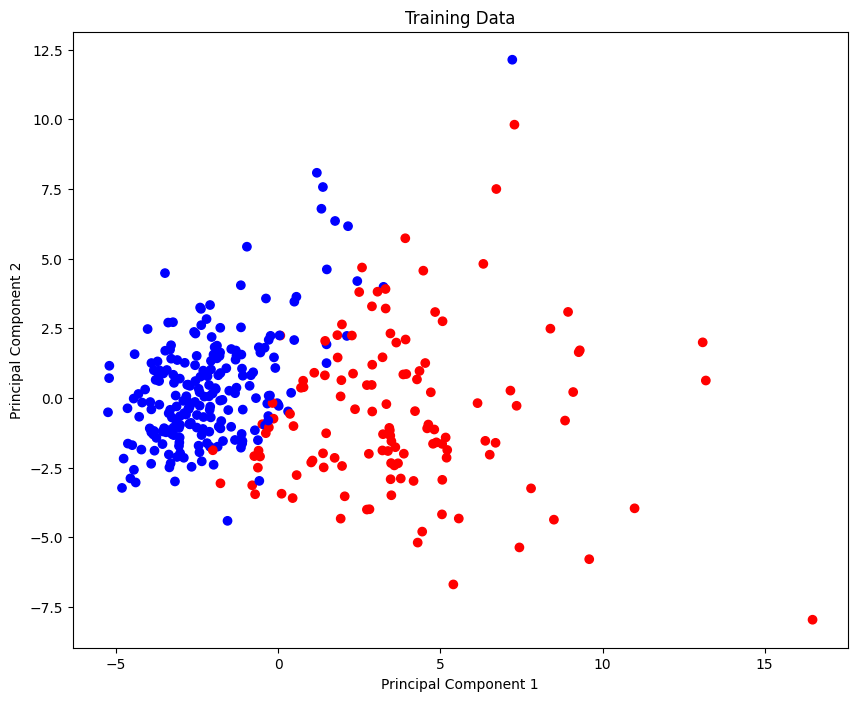

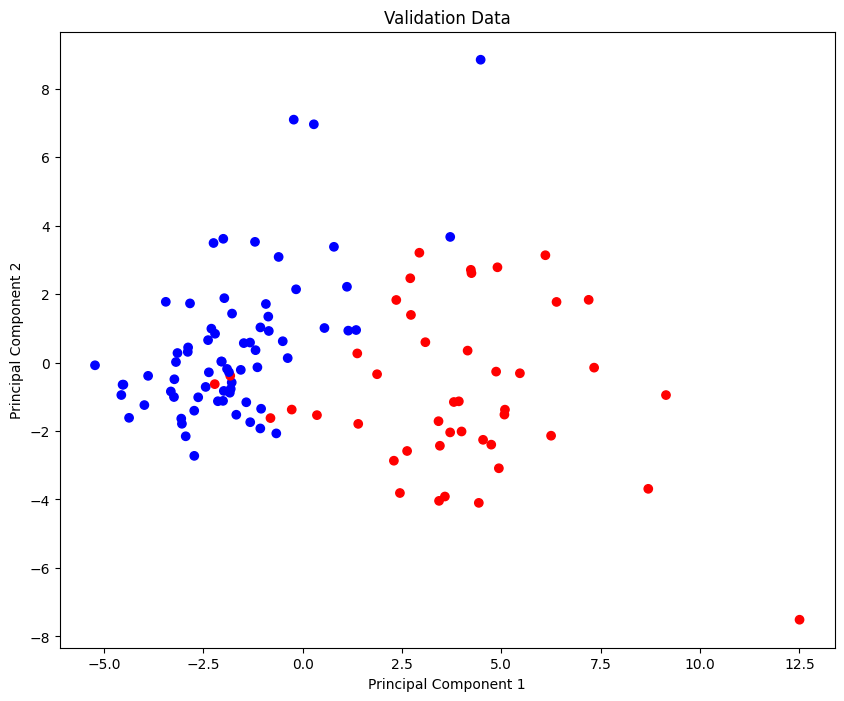

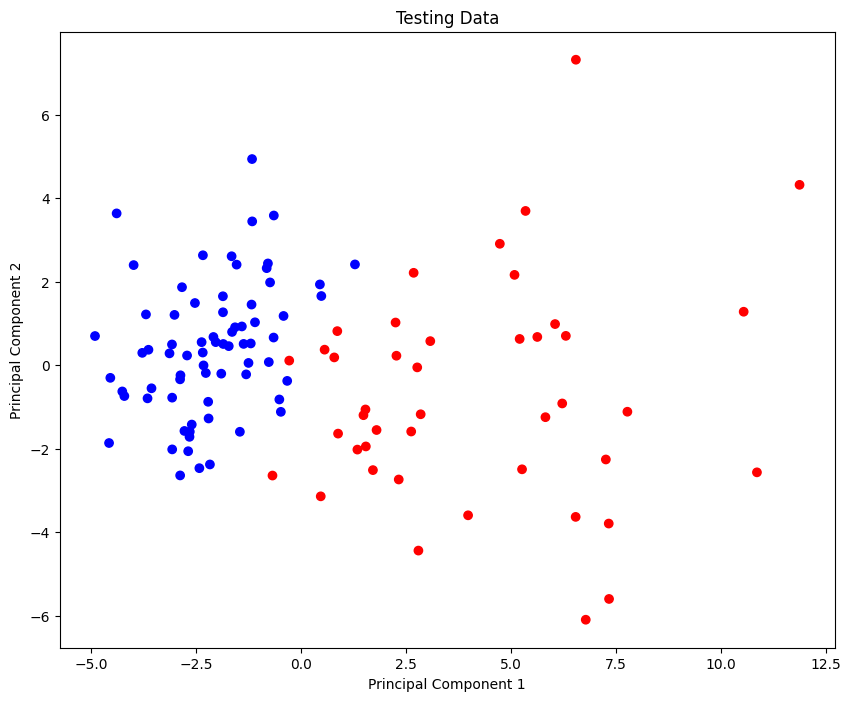

In [71]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train.map({"M": "red", "B": "blue"}))
plt.title("Training Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(X_val_pca[:, 0], X_val_pca[:, 1], c=y_val.map({"M": "red", "B": "blue"}))
plt.title("Validation Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test.map({"M": "red", "B": "blue"}))
plt.title("Testing Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [72]:
# Define the classifiers to compare
classifiers = [
    ('SVM', SVC()),
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier())
]

# Define the parameter grid for each classifier
param_grids = {
    'SVM': {
        'kernel': ['linear', 'rbf', 'sigmoid'],
        'C': [0.1, 1, 10],
        'gamma': [0.1, 1, 10]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7]
    }
}

# Perform GridSearchCV for each classifier
results = {}
for clf_name, clf in classifiers:
    grid_search = GridSearchCV(clf, param_grids[clf_name], cv=5)
    grid_search.fit(X_train_kpca, y_train)
    results[clf_name] = grid_search

# Print the best hyperparameters and scores for each classifier
for clf_name, result in results.items():
    print(f"Classifier: {clf_name}")
    print("Best Hyperparameters: ", result.best_params_)
    print("Best Score: ", result.best_score_)
    print()

# Select the best classifier based on the results
best_classifier = max(results, key=lambda k: results[k].best_score_)
print("Best Model: ", best_classifier)

# Evaluate the best model on the test set
best_model = results[best_classifier].best_estimator_
y_pred = best_model.predict(X_test_kpca)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", test_accuracy)


Classifier: SVM
Best Hyperparameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best Score:  0.9413469735720377

Classifier: Logistic Regression
Best Hyperparameters:  {'C': 10}
Best Score:  0.9442881500426259

Classifier: Random Forest
Best Hyperparameters:  {'max_depth': 10, 'n_estimators': 100}
Best Score:  0.932608695652174

Classifier: KNN
Best Hyperparameters:  {'n_neighbors': 3}
Best Score:  0.9384484228473999

Best Model:  Logistic Regression
Test Accuracy:  0.9824561403508771
